# Degree distribution

- Guardare grado di ogni nodo (se una riga ha 0 non interferisce)

- Istogramma distribuzione grado (: informazione su grado compattezza rete, quanto è connessa)

- Distribuzione temporale: è uniforme durante la giornata?

In [117]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

In [118]:
data = pd.read_csv('C:\\Users\\utente\\Documents\\DSSC_IIyear\\Voli\\Dataframe\\S3_degrees.csv')

In [119]:
data

,flight,sector_hours,degree
0,A6RTS_OMDW_EGGW_20170901055500,"['LTAAAEU67_0800_0900_E', 'LTAAANOR2_0900_1000...",154
1,AAB249_EBKT_LFMN_20170901070500,"['EBBUWLS_0700_0800_E', 'EBBUWHS_0700_0800_E',...",127
2,AAB249_LFMN_LIEO_20170901090500,"['LFMMMNST_0900_1000_E', 'LFMMBTAJ_0900_1000_E...",56
3,AAB25C_LOWW_UUMO_20170901143500,"['LZBBL33_1500_1600_E', 'LZBBU_1500_1600_E', '...",45
4,AAB571_EBBR_EGNV_20170901050500,"['EBBUNWC_0530_0600_E', 'EDYYB5KL_0500_0600_E'...",64
...,...,...,...
29912,XLF056_LFPG_MMUN_20170901153100,['LFFFTH_1600_1700_E' 'LFFFUZ_1600_1700_E' 'LF...,42
29913,XLF1451_LFML_LFPG_20170901030500,['LFMMMALY_0330_0400_E' 'LFMMWW_0330_0400_E' '...,0
29914,XRO546_LFMD_EGCC_20170901180000,['LFMMSBAM_1800_1900_E' 'LFMMB12_1800_1900_E' ...,56
29915,XRO552_EHAM_LFMD_20170901150000,['EHAACOD_1500_1600_E' 'EHAASECT3_1520_1600_E'...,233


In [120]:
count = data['degree'].sum()
count

2498068

In [121]:
count = 0
for i in range(0,len(data)):
    count += data['degree'].loc[i]
count

2498068

In [122]:
data['degree'].min()

0

In [123]:
data['degree'].max()

457

In [124]:
int(data['degree'].mean())

83

In [125]:
len(data[data['degree']>=200])

2445

In [126]:
data[data['degree']==0]

,flight,sector_hours,degree
45,AAF534_GOOY_LFML_20170901211500,"['GCCCOCE_2200_2300_E', 'GMMMSOU_2300_2400_E',...",0
49,AAF707_LFML_DAAG_20170901053000,"['LFMMMOML_0500_0600_E', 'LFMMF12_0600_0700_E'...",0
53,AAF715_LFML_DABC_20170901114000,"['LFMMMOML_1200_1300_E', 'LFMMF12_1200_1300_E'...",0
64,AAF806_DAAG_LFML_20170901015000,"['LFMMMFDZ_0100_0200_E', 'LFMMRAWM_0100_0200_E']",0
66,AAF844_DAAG_LFLL_20170901225000,"['LECBBKE_2300_2400_E', 'LFMMMFDZ_2300_2400_E'...",0
...,...,...,...
29905,XK521EQ_LFMN_LFKJ_20170901181000,['LFMMSBAM_1800_1900_E'],0
29906,XK580FM_LFKF_LFMN_20170901144500,['LFMMBTAJ_1500_1600_E'],0
29907,XK581GB_LFMN_LFKF_20170901132000,['LFMMBTAJ_1300_1400_E'],0
29908,XK590LW_LFKF_LFML_20170901131500,['LFMMBTAJ_1300_1400_E' 'LFMMMOML_1400_1500_E'],0


# Boxplot

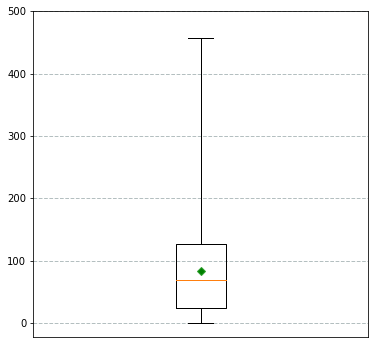

In [134]:
diamond = dict(markerfacecolor='g', marker='D')
x = [data['degree']]
plt.figure(figsize=(6,6))
plt.boxplot(x, whis='range', showmeans=True, meanprops=diamond)

plt.xticks([])
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
plt.yticks(np.linspace(0,500,6))
#plt.xlabel('Degree')
#plt.ylabel('Frequency')
#plt.title('\nNode degree Boxplot\n', fontsize=20)
#plt.axhline(y=70, color='#95a5a6', linestyle='--', linewidth=1)
#plt.box(on=None)
#plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.tight_layout()
#plt.show()

plt.savefig('C:\\Users\\utente\\Documents\\DSSC_IIyear\\Voli\\Plots\\S3_boxplot1.png')

# Istogramma

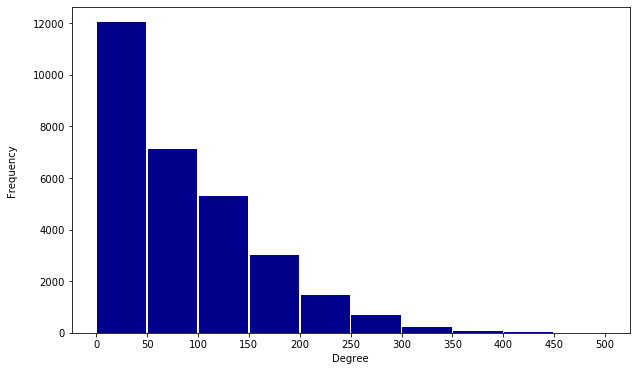

In [106]:
x = [data['degree']]
num_bins = 10
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x, num_bins, range=(0,500), rwidth=0.97, facecolor='darkblue', alpha=1)

plt.xticks(np.linspace(0,500,11))
plt.xlabel('Degree')
plt.ylabel('Frequency\n')
#plt.title('\nDistribution of node degree\n', fontsize=20)
#plt.axhline(y=70, color='#95a5a6', linestyle='--', linewidth=1)
#plt.box(on=None)
#plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.tight_layout()
#plt.show()

plt.savefig('C:\\Users\\utente\\Documents\\DSSC_IIyear\\Voli\\Plots\\S3_histogram1.png')

In [107]:
small_deg = data[data['degree']<20]

In [108]:
data

,flight,sector_hours,degree
0,A6RTS_OMDW_EGGW_20170901055500,"['LTAAAEU67_0800_0900_E', 'LTAAANOR2_0900_1000...",154
1,AAB249_EBKT_LFMN_20170901070500,"['EBBUWLS_0700_0800_E', 'EBBUWHS_0700_0800_E',...",127
2,AAB249_LFMN_LIEO_20170901090500,"['LFMMMNST_0900_1000_E', 'LFMMBTAJ_0900_1000_E...",56
3,AAB25C_LOWW_UUMO_20170901143500,"['LZBBL33_1500_1600_E', 'LZBBU_1500_1600_E', '...",45
4,AAB571_EBBR_EGNV_20170901050500,"['EBBUNWC_0530_0600_E', 'EDYYB5KL_0500_0600_E'...",64
...,...,...,...
29912,XLF056_LFPG_MMUN_20170901153100,['LFFFTH_1600_1700_E' 'LFFFUZ_1600_1700_E' 'LF...,42
29913,XLF1451_LFML_LFPG_20170901030500,['LFMMMALY_0330_0400_E' 'LFMMWW_0330_0400_E' '...,0
29914,XRO546_LFMD_EGCC_20170901180000,['LFMMSBAM_1800_1900_E' 'LFMMB12_1800_1900_E' ...,56
29915,XRO552_EHAM_LFMD_20170901150000,['EHAACOD_1500_1600_E' 'EHAASECT3_1520_1600_E'...,233


In [109]:
am1 = data[(data['flight'].str[-6:-4])=='01']
am2 = data[(data['flight'].str[-6:-4])=='02']
am3 = data[(data['flight'].str[-6:-4])=='03']
am4 = data[(data['flight'].str[-6:-4])=='04']
am5 = data[(data['flight'].str[-6:-4])=='05']
am6 = data[(data['flight'].str[-6:-4])=='06']
am7 = data[(data['flight'].str[-6:-4])=='07']
am8 = data[(data['flight'].str[-6:-4])=='08']
am9 = data[(data['flight'].str[-6:-4])=='09']
am10 = data[(data['flight'].str[-6:-4])=='10']
am11 = data[(data['flight'].str[-6:-4])=='11']
am12 = data[(data['flight'].str[-6:-4])=='12']
pm1 = data[(data['flight'].str[-6:-4])=='13']
pm2 = data[(data['flight'].str[-6:-4])=='14']
pm3 = data[(data['flight'].str[-6:-4])=='15']
pm4 = data[(data['flight'].str[-6:-4])=='16']
pm5 = data[(data['flight'].str[-6:-4])=='17']
pm6 = data[(data['flight'].str[-6:-4])=='18']
pm7 = data[(data['flight'].str[-6:-4])=='19']
pm8 = data[(data['flight'].str[-6:-4])=='20']
pm9 = data[(data['flight'].str[-6:-4])=='21']
pm10 = data[(data['flight'].str[-6:-4])=='22']
pm11 = data[(data['flight'].str[-6:-4])=='23']
pm12 = data[(data['flight'].str[-6:-4])=='00']

In [110]:
am10

,flight,sector_hours,degree
5,AAB678_LEIB_LPPR_20170901100000,"['LECPIAX_0900_1000_E', 'LECPIRX_0900_1000_E',...",97
7,AAB713_EBKT_EHBK_20170901103000,"['EBBUWLS_1000_1100_E', 'EBBUHLC_1000_1100_E',...",27
19,AAF255_LFPG_DAAG_20170901100000,"['LFFFDODG_1000_1100_E', 'LFBBP12_1000_1100_E'...",151
58,AAF738_DAAG_LFBD_20170901100500,"['LECBLVS_0900_1000_E', 'LECBBAS_1000_1040_E',...",113
100,ABG8070_LTAI_UNBB_20170901102000,"['LTAIALL_1100_1200_E', 'LTAAASOU_1100_1200_E'...",76
...,...,...,...
29853,WZZ9NA_LROP_LCLK_20170901104900,['LRBBKNL16_1100_1200_E' 'LBSRVNL4_1100_1200_E...,145
29855,WZZ9PV_LIBD_LROP_20170901105500,['LIBBME_1100_1200_E' 'LDZOULS_1100_1200_E' 'L...,135
29862,WZZ9XC_EPGD_EDDH_20170901100000,['EPWWBDL_1000_1100_E' 'EDUUOSE1O_1000_1100_E'...,66
29866,XGO3GW_LFMN_EGLF_20170901102000,['LFMMMNST_1000_1100_E' 'LFMMB1_1000_1100_E' '...,169


In [111]:
morning = pd.concat([am6,am7,am8,am9,am10,am11])

In [112]:
afternoon = pd.concat([am12,pm1,pm2,pm3,pm4,pm5])

In [113]:
evening = pd.concat([pm6,pm7,pm8,pm9,pm10,pm11])

In [114]:
night = pd.concat([pm12,am1,am2,am3,am4,am5])

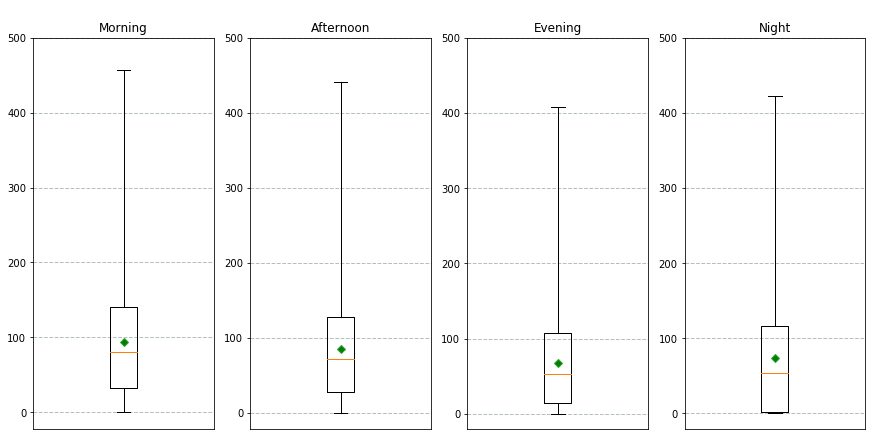

In [115]:
fig, axs = plt.subplots(1, 4, figsize = (12,6), constrained_layout=True)

#fig.suptitle('\nNode degree Boxplot\n', fontsize=20)

diamond = dict(markerfacecolor='g', marker='D')

axs[0].boxplot(morning['degree'], whis='range', showmeans=True, meanprops=diamond)
axs[0].set_title('Morning')
axs[0].grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
axs[0].set_yticks(np.linspace(0,500,6))
axs[0].get_xaxis().set_visible(False)

axs[1].boxplot(afternoon['degree'], whis='range', showmeans=True, meanprops=diamond)
axs[1].set_title('Afternoon')
axs[1].grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
axs[1].set_yticks(np.linspace(0,500,6))
axs[1].get_xaxis().set_visible(False)

axs[2].boxplot(evening['degree'], whis='range', showmeans=True, meanprops=diamond)
axs[2].set_title('\nEvening')
axs[2].grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
axs[2].set_yticks(np.linspace(0,500,6))
axs[2].get_xaxis().set_visible(False)

axs[3].boxplot(night['degree'], whis='range', showmeans=True, meanprops=diamond)
axs[3].set_title('\nNight')
axs[3].grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
axs[3].set_yticks(np.linspace(0,500,6))
axs[3].get_xaxis().set_visible(False)


#plt.show()

plt.savefig('C:\\Users\\utente\\Documents\\DSSC_IIyear\\Voli\\Plots\\S3_boxplot2.png')

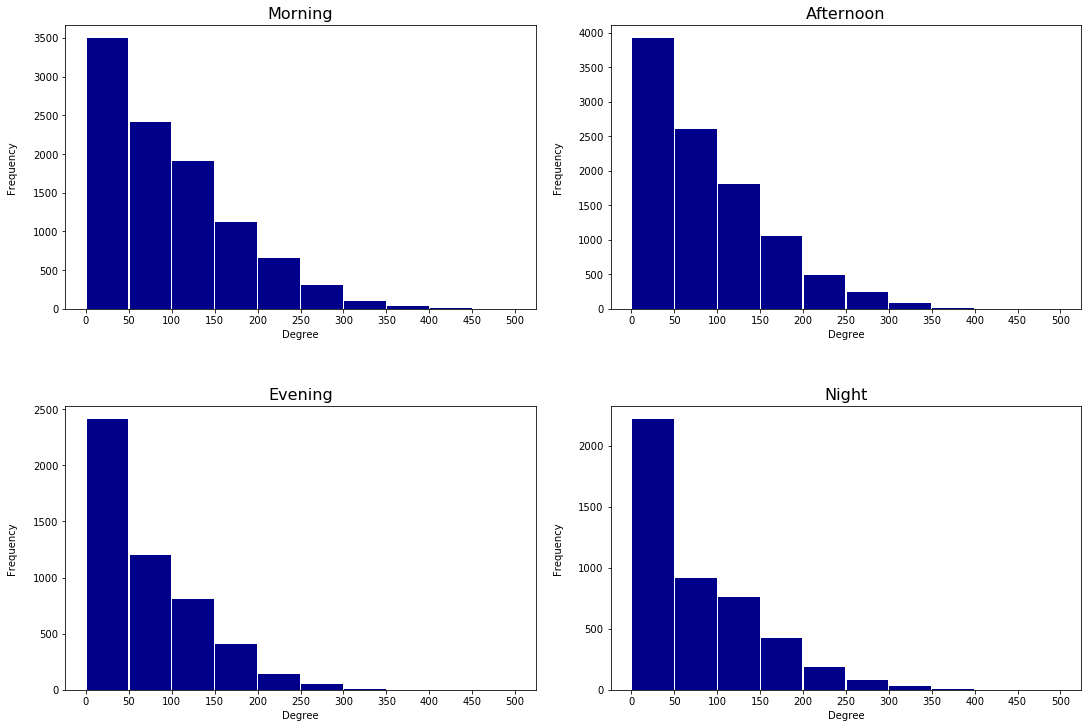

In [116]:
fig, axs = plt.subplots(2, 2, figsize = (15,10), constrained_layout=True)

#fig.suptitle('\nNode degree distribution\n', fontsize=20)

axs[0,0].hist([morning['degree']], 10, range=(0,500), rwidth=0.97, facecolor='darkblue', alpha=1)
axs[0,0].set_title('Morning', fontsize=16)
axs[0,0].set_xlabel('Degree')
axs[0,0].set_ylabel('Frequency\n')
axs[0,0].set_xticks(np.linspace(0,500,11))

axs[0,1].hist([afternoon['degree']], 10, range=(0,500), rwidth=0.97, facecolor='darkblue', alpha=1)
axs[0,1].set_title('Afternoon', fontsize=16)
axs[0,1].set_xlabel('Degree')
axs[0,1].set_ylabel('Frequency\n')
axs[0,1].set_xticks(np.linspace(0,500,11))

axs[1,0].hist([evening['degree']], 10, range=(0,500), rwidth=0.97, facecolor='darkblue', alpha=1)
axs[1,0].set_title('\n\nEvening', fontsize=16)
axs[1,0].set_xlabel('Degree')
axs[1,0].set_ylabel('Frequency\n')
axs[1,0].set_xticks(np.linspace(0,500,11))

axs[1,1].hist([night['degree']], 10, range=(0,500), rwidth=0.97, facecolor='darkblue', alpha=1)
axs[1,1].set_title('\n\nNight', fontsize=16)
axs[1,1].set_xlabel('Degree')
axs[1,1].set_ylabel('Frequency\n')
axs[1,1].set_xticks(np.linspace(0,500,11))


plt.savefig('C:\\Users\\utente\\Documents\\DSSC_IIyear\\Voli\\Plots\\S3_histogram2.png')

x = [morning['degree']]
num_bins = 12
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x, num_bins, range=(0,600), rwidth=0.9, facecolor='purple', alpha=1)


plt.xticks(np.linspace(0,600,13))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('\nDistribution of node degree - MORNING\n', fontsize=20)
#plt.axhline(y=70, color='#95a5a6', linestyle='--', linewidth=1)

#plt.box(on=None)

#plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.tight_layout()
plt.show()

x = [afternoon['degree']]
num_bins = 12
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x, num_bins, range=(0,600), rwidth=0.9, facecolor='purple', alpha=1)


plt.xticks(np.linspace(0,600,13))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('\nDistribution of node degree - AFTERNOON\n', fontsize=20)
#plt.axhline(y=70, color='#95a5a6', linestyle='--', linewidth=1)

#plt.box(on=None)

#plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.tight_layout()
plt.show()

x = [evening['degree']]
num_bins = 12
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x, num_bins, range=(0,600), rwidth=0.9, facecolor='purple', alpha=1)


plt.xticks(np.linspace(0,600,13))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('\nDistribution of node degree - EVENING\n', fontsize=20)
#plt.axhline(y=70, color='#95a5a6', linestyle='--', linewidth=1)

#plt.box(on=None)

#plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.tight_layout()
plt.show()

x = [night['degree']]
num_bins = 12
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x, num_bins, range=(0,600), rwidth=0.9, facecolor='purple', alpha=1)


plt.xticks(np.linspace(0,600,13))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('\nDistribution of node degree - NIGHT\n', fontsize=20)
#plt.axhline(y=70, color='#95a5a6', linestyle='--', linewidth=1)

#plt.box(on=None)

#plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.tight_layout()
plt.show()

plt.figure(figsize=(14,20))


plt.title('\nNode degree Boxplot\n', fontsize=20)
plt.subplot(2,2,1)
diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(morning['degree'], whis='range', showmeans=True, meanprops=diamond)
plt.yticks(np.linspace(0,600,7))
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)

plt.subplot(2,2,2)
diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(afternoon['degree'], whis='range', showmeans=True, meanprops=diamond)
plt.yticks(np.linspace(0,600,7))
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)

plt.subplot(2,2,3)
diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(evening['degree'], whis='range', showmeans=True, meanprops=diamond)
plt.yticks(np.linspace(0,600,7))
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)

plt.subplot(2,2,4)
diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(night['degree'], whis='range', showmeans=True, meanprops=diamond)
plt.yticks(np.linspace(0,600,7))
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)

plt.show()

x = [small_deg['degree']]
num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(x, num_bins, range=(0,20), rwidth=0.9, facecolor='darkorange', alpha=1)


plt.xticks(np.linspace(0,20,21))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('\nDistribution of node degree\n', fontsize=20)
#plt.axhline(y=70, color='#95a5a6', linestyle='--', linewidth=1)

#plt.box(on=None)

#plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7)
#plt.tight_layout()
plt.show()